<a href="https://colab.research.google.com/github/woshro/ml-projects/blob/main/%5Ckbd-ady-classificator%5Cady_kbd_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from datasets import load_dataset
import json
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from time import time


**License**

This dataset is licensed under the [Creative Commons Attribution 4.0 International (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/) license.

```bibtex
@dataset{adiga-ai_circassian-russian_v1,
  author       = {Anzor Qunash},
  title        = {Circassian-Russian Parallel Text Corpus v1.0},
  year         = {2025},
  publisher    = {adiga.ai},
  url          = {https://huggingface.co/datasets/adiga-ai/circassian-parallel-corpus}
}
```

## **Структура** данных



### Data Instances

Each example is a dictionary containing a translation pair:

```json
{
  "translation": {
    "kbd": "Уи пщэдджыжь фIыуэ!",
    "ru": "Доброе утро!"
  }
}
```

### Data Splits

| Split | Source | Target | Examples |
|-------|--------|--------|----------|
| kbd_ru | East Circassian | Russian | 120,218 |
| ru_kbd | Russian | East Circassian | 99,956 |
| ady_ru | West Circassian | Russian | 57,305 |
| ru_ady | Russian | West Circassian | 53,989 |
| Total | | | 331,468 |

## Dataset Creation

### Source Data

Source texts were collected from publicly available sources, including crowdsourced texts, dictionary entries, folklore texts, lists of proverbs and sayings. The specific sources for each language pair are detailed below.

For folklore texts, special processing was applied to create high-quality translation pairs:
- Works without existing Russian translations were translated from scratch into Russian and then split into sentence pairs
- Works with existing Russian translations were refined by converting "artistic" translations into more precise, literal translations better suited for machine translation training

This approach ensured that the parallel text pairs maintain semantic equivalence while being more suitable for training translation models than purely literary translations that might prioritize style over precision.

### Data Quality and Processing

All data was verified for quality either manually or through automated processes. The dataset underwent rigorous cleaning and preprocessing:

- **Translation methodology**: All non-dictionary translations were created from scratch or substantially reworked to ensure semantic accuracy for machine translation training, rather than literary quality.
- **Quality Verification**: The majority of entries were checked for accuracy and completeness by a native speaker.
- **Standardization**: All [palochka](https://en.wikipedia.org/wiki/Palochka)-like characters (1, l, I, І, ӏ) were standardized to uppercase palochka (Ӏ).
- **Script Consistency**: Look-alike Latin letters were converted to their Cyrillic equivalents to maintain script consistency.
- **Deduplication**: Duplicate entries were identified and removed to ensure dataset quality.
- **Filtering**: Entries with imbalanced text lengths or other quality issues were filtered out.
- **Normalization**: Special characters and spacing were normalized across all texts.

These processing steps helped ensure the dataset's consistency and reliability for machine translation tasks.

## Considerations for Using the Data

This dataset was created to support the development of machine translation systems for the Circassian language, contributing to language preservation and digital accessibility for Circassian speakers. Researchers working with this data should be aware that:

- The two Circassian dialects (Kabardian and Adyghe) are structurally related but differ in phonology, vocabulary, and some grammatical features
- The corpus contains texts from various time periods and domains, which may exhibit stylistic and lexical differences
- While extensive cleaning has been performed, some translation pairs may still contain minor inaccuracies
- For optimal results in machine translation tasks, models should be trained on each dialect separately


# Загрузка данных

In [2]:
from datasets import load_dataset

# Login using e.g. `huggingface-cli login` to access this dataset
ds = load_dataset("adiga-ai/circassian-parallel-corpus", verification_mode="no_checks")

In [3]:
# посмотрим на данные
print(ds)
print("\nПример кабардинского:", ds["kbd_ru"][0])
print("Пример адыгейского:", ds["ady_ru"][0])

DatasetDict({
    ru_kbd: Dataset({
        features: ['translation'],
        num_rows: 99956
    })
    kbd_ru: Dataset({
        features: ['translation'],
        num_rows: 120218
    })
    ru_ady: Dataset({
        features: ['translation'],
        num_rows: 53989
    })
    ady_ru: Dataset({
        features: ['translation'],
        num_rows: 57305
    })
})

Пример кабардинского: {'translation': '{"kbd": "ублэрэкӀын", "ru": "переворачивать"}'}
Пример адыгейского: {'translation': '{"ady": "Къэбарэу Тхьэм ы Къо тэ къытиӀуагъэу къышъодгъэӀурэр мары: Тхьэр – нэфын, шӀункӀыгъи ащ хэлъэп.", "ru": "Вот весть, которую нам сказал Сын Божий и которую мы передаем вам: Бог – свет, и нет в Нем никакой тьмы."}'}


## Распарсим данные

Классы такие
*   Кабардинский (label = 0)
*   Адыгейский (label = 1)



In [4]:
import json

texts = []
labels = []

# Кабардинский (label = 0)
print("Собираем кабардинские тексты...")

# Из kbd_ru
for ex in ds["kbd_ru"]:
    translation_dict = json.loads(ex["translation"])
    texts.append(translation_dict["kbd"])
    labels.append(0)

# Из ru_kbd
for ex in ds["ru_kbd"]:
    translation_dict = json.loads(ex["translation"])
    texts.append(translation_dict["kbd"])
    labels.append(0)

print(f"Кабардинских текстов: {labels.count(0)}")

# Адыгейский (label = 1)
print("Собираем адыгейские тексты...")

# Из ady_ru
for ex in ds["ady_ru"]:
    translation_dict = json.loads(ex["translation"])
    texts.append(translation_dict["ady"])
    labels.append(1)

# Из ru_ady
for ex in ds["ru_ady"]:
    translation_dict = json.loads(ex["translation"])
    texts.append(translation_dict["ady"])
    labels.append(1)

print(f"Адыгейских текстов: {labels.count(1)}")
print(f"\nВсего примеров: {len(texts)}")

# Посмотрим несколько примеров
print("\n=== Примеры ===")
print(f"Кабардинский: {texts[0]}")
print(f"Адыгейский: {texts[220174]}")  # Первый адыгейский

Собираем кабардинские тексты...
Кабардинских текстов: 220174
Собираем адыгейские тексты...
Адыгейских текстов: 111294

Всего примеров: 331468

=== Примеры ===
Кабардинский: ублэрэкӀын
Адыгейский: Къэбарэу Тхьэм ы Къо тэ къытиӀуагъэу къышъодгъэӀурэр мары: Тхьэр – нэфын, шӀункӀыгъи ащ хэлъэп.


## Разделение на train/test

Соотношение: 20% данных в тест, 80% в обучение. Стандартное для больших датасетов

`stratify=labels` Сохраняет пропорции классов в train и test. В датасете ~66% кабардинского и ~34% адыгейского, поэтому без stratify можно случайно получить несбалансированные выборки.

### Проблема несбалансированных выборок:

Допустим что в train получилось 70% кабардинского, а в test — 60%.

Тогда:
* Модель переобучится на кабардинский
* Поулчится высокая точность на train, но низкая на test.
* Несправедливое сравнение - если изменить параметры модели и заново разделить данные, результаты будут несопоставимы из-за разного баланса





In [5]:
print("Разделение данных на train/test...")
X_train, X_test, y_train, y_test = train_test_split(
    texts, labels, test_size=0.2, random_state=42, stratify=labels
)

print(f"Train: {len(X_train)} примеров")
print(f"Test: {len(X_test)} примеров\n")


Разделение данных на train/test...
Train: 265174 примеров
Test: 66294 примеров



## Векторизация текстов
В качестве Baseline удем исопльзовать TF-IDF

В качестве analyzer выберем `char`

* Сложная морфология (много приставок, суффиксов)
* Специфические символы (Ӏ, къ, гъ)
* Характерные сочетания, которые лучше ловятся на уровне символов

В качестве n-граммы выберем `1-3-граммы`

* Короткие n-граммы (1-2) - слишком общие
* Длинные (4-5+) - слишком специфичные, разреженные
* (1,3) - золотая середина для большинства задач

Разреженная матрица (sparse matrix)

Большинство значений = 0, хранятся только ненулевые → экономия памяти!



In [6]:
# Векторизация текстов (TF-IDF)
print("Векторизация текстов с помощью TF-IDF...")
vectorizer = TfidfVectorizer(
    max_features=5000,  # Ограничиваем количество признаков
    ngram_range=(1, 3),  # Используем uni-, bi- и tri-граммы символов
    analyzer='char',  # Анализируем по символам (важно для морфологически богатых языков)
    min_df=2  # Минимальная частота появления признака
)

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print(f"Размерность векторов: {X_train_vec.shape[1]}\n")

Векторизация текстов с помощью TF-IDF...
Размерность векторов: 5000



# Обучение логистической регрессии

In [ ]:
print("Обучение логистической регрессии...")
clf = LogisticRegression(
    max_iter=1000,
    random_state=42,
    C=1.0,  # Параметр регуляризации
    solver='lbfgs'
)

clf.fit(X_train_vec, y_train)
print("Обучение завершено!\n")

# Предсказания
y_pred = clf.predict(X_test_vec)


Обучение логистической регрессии...
Обучение завершено!



ЭКСПЕРИМЕНТЫ С ПАРАМЕТРАМИ ОБУЧЕНИЯ

📝 Текущий baseline:
   Accuracy: 0.9435 (94.35%)

🎯 Что будем пробовать:

   1. Параметр C (регуляризация)
   2. Разные solver'ы (алгоритмы оптимизации)
   3. Класс весов (class_weight)
   4. Penalty (тип регуляризации L1/L2)
   5. Grid Search (автоматический подбор)
   6. Cross-validation (кросс-валидация)


🔬 ЭКСПЕРИМЕНТ 1: Влияние параметра C
----------------------------------------------------------------------
C контролирует регуляризацию:
  • Большой C (100) = слабая регуляризация = сложная модель
  • Малый C (0.01) = сильная регуляризация = простая модель

  Тестируем C=0.001... Accuracy: 0.7668, F1: 0.7222
  Тестируем C=0.01... Accuracy: 0.8940, F1: 0.8890
  Тестируем C=0.1... Accuracy: 0.9287, F1: 0.9273
  Тестируем C=0.5... Accuracy: 0.9396, F1: 0.9389
  Тестируем C=1.0... Accuracy: 0.9425, F1: 0.9420
  Тестируем C=2.0... Accuracy: 0.9443, F1: 0.9438
  Тестируем C=5.0... Accuracy: 0.9450, F1: 0.9446
  Тестируем C=10.0... Accuracy: 0.9462, 

c:\Users\alina.oshroeva\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9462, F1: 0.9459


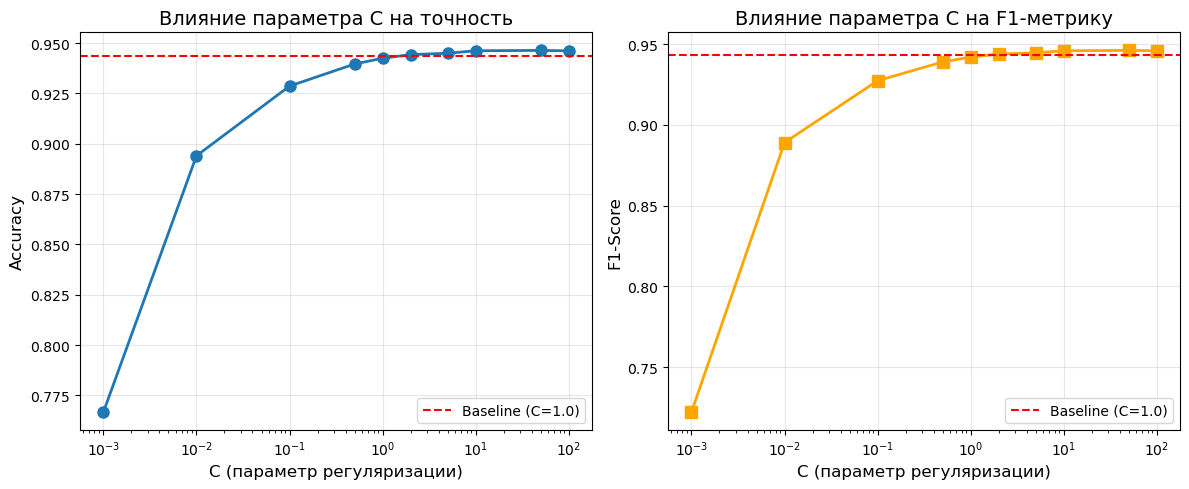


✅ Лучший результат: C=50.0, Accuracy=0.9464
   Улучшение: 0.29%


🔬 ЭКСПЕРИМЕНТ 2: Сравнение алгоритмов оптимизации (solver)
----------------------------------------------------------------------
  Тестируем solver='lbfgs'... Accuracy: 0.9464, Время: 87.48s
  Тестируем solver='liblinear'... Accuracy: 0.9464, Время: 26.45s
  Тестируем solver='saga'... Accuracy: 0.9464, Время: 96.14s
  Тестируем solver='newton-cg'... Accuracy: 0.9464, Время: 41.41s

📊 Результаты:
   Solver  Accuracy  F1-Score  Время (сек)
    lbfgs  0.946390  0.946087    87.476944
liblinear  0.946375  0.946072    26.450679
     saga  0.946405  0.946103    96.144758
newton-cg  0.946390  0.946087    41.406889

🔬 ЭКСПЕРИМЕНТ 3: Балансировка классов (class_weight)
----------------------------------------------------------------------
У вас несбалансированные данные:
  Кабардинский: 176139 (66.4%)
  Адыгейский:   89035 (33.6%)

  Тестируем class_weight=None (по умолчанию)... Accuracy: 0.9464, F1: 0.9461
  Тестируем class_wei

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

# =============================================================================
# ЧТО МОЖНО УЛУЧШИТЬ В ОБУЧЕНИИ?
# =============================================================================

print("=" * 70)
print("ЭКСПЕРИМЕНТЫ С ПАРАМЕТРАМИ ОБУЧЕНИЯ")
print("=" * 70)
print("\n📝 Текущий baseline:")
print("   Accuracy: 0.9435 (94.35%)")
print("\n🎯 Что будем пробовать:\n")
print("   1. Параметр C (регуляризация)")
print("   2. Разные solver'ы (алгоритмы оптимизации)")
print("   3. Класс весов (class_weight)")
print("   4. Penalty (тип регуляризации L1/L2)")
print("   5. Grid Search (автоматический подбор)")
print("   6. Cross-validation (кросс-валидация)")
print("\n" + "=" * 70 + "\n")

# =============================================================================
# ЭКСПЕРИМЕНТ 1: ПОДБОР ПАРАМЕТРА C (РЕГУЛЯРИЗАЦИЯ)
# =============================================================================
print("🔬 ЭКСПЕРИМЕНТ 1: Влияние параметра C")
print("-" * 70)
print("C контролирует регуляризацию:")
print("  • Большой C (100) = слабая регуляризация = сложная модель")
print("  • Малый C (0.01) = сильная регуляризация = простая модель")
print()

# Попробуем разные значения C
c_values = [0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0, 50.0, 100.0]
results_c = []

for c in c_values:
    print(f"  Тестируем C={c}...", end=" ")
    
    clf = LogisticRegression(
        C=c,
        max_iter=1000,
        random_state=42,
        solver='lbfgs'
    )
    
    clf.fit(X_train_vec, y_train)
    y_pred = clf.predict(X_test_vec)
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    results_c.append({
        'C': c,
        'Accuracy': acc,
        'F1-Score': f1
    })
    
    print(f"Accuracy: {acc:.4f}, F1: {f1:.4f}")

# Визуализация
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
df_c = pd.DataFrame(results_c)
plt.plot(df_c['C'], df_c['Accuracy'], marker='o', linewidth=2, markersize=8)
plt.axhline(y=0.9435, color='r', linestyle='--', label='Baseline (C=1.0)')
plt.xscale('log')
plt.xlabel('C (параметр регуляризации)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Влияние параметра C на точность', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(df_c['C'], df_c['F1-Score'], marker='s', linewidth=2, markersize=8, color='orange')
plt.axhline(y=0.9431, color='r', linestyle='--', label='Baseline (C=1.0)')
plt.xscale('log')
plt.xlabel('C (параметр регуляризации)', fontsize=12)
plt.ylabel('F1-Score', fontsize=12)
plt.title('Влияние параметра C на F1-метрику', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

best_c = df_c.loc[df_c['Accuracy'].idxmax()]
print(f"\n✅ Лучший результат: C={best_c['C']}, Accuracy={best_c['Accuracy']:.4f}")
print(f"   Улучшение: {(best_c['Accuracy'] - 0.9435) * 100:.2f}%\n")

# =============================================================================
# ЭКСПЕРИМЕНТ 2: РАЗНЫЕ SOLVER'Ы
# =============================================================================
print("\n" + "=" * 70)
print("🔬 ЭКСПЕРИМЕНТ 2: Сравнение алгоритмов оптимизации (solver)")
print("-" * 70)

solvers = ['lbfgs', 'liblinear', 'saga', 'newton-cg']
results_solver = []

for solver in solvers:
    print(f"  Тестируем solver='{solver}'...", end=" ")
    start_time = time()
    
    try:
        clf = LogisticRegression(
            C=best_c['C'],  # Используем лучший C из предыдущего эксперимента
            max_iter=1000,
            random_state=42,
            solver=solver
        )
        
        clf.fit(X_train_vec, y_train)
        y_pred = clf.predict(X_test_vec)
        
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        elapsed = time() - start_time
        
        results_solver.append({
            'Solver': solver,
            'Accuracy': acc,
            'F1-Score': f1,
            'Время (сек)': elapsed
        })
        
        print(f"Accuracy: {acc:.4f}, Время: {elapsed:.2f}s")
    except Exception as e:
        print(f"Ошибка: {e}")

df_solver = pd.DataFrame(results_solver)
print("\n📊 Результаты:")
print(df_solver.to_string(index=False))

# =============================================================================
# ЭКСПЕРИМЕНТ 3: CLASS_WEIGHT (баланс классов)
# =============================================================================
print("\n" + "=" * 70)
print("🔬 ЭКСПЕРИМЕНТ 3: Балансировка классов (class_weight)")
print("-" * 70)
print(f"У вас несбалансированные данные:")
print(f"  Кабардинский: {y_train.count(0)} ({y_train.count(0)/len(y_train)*100:.1f}%)")
print(f"  Адыгейский:   {y_train.count(1)} ({y_train.count(1)/len(y_train)*100:.1f}%)")
print()

class_weights = [None, 'balanced']
results_weight = []

for cw in class_weights:
    cw_name = cw if cw else "None (по умолчанию)"
    print(f"  Тестируем class_weight={cw_name}...", end=" ")
    
    clf = LogisticRegression(
        C=best_c['C'],
        max_iter=1000,
        random_state=42,
        solver='lbfgs',
        class_weight=cw
    )
    
    clf.fit(X_train_vec, y_train)
    y_pred = clf.predict(X_test_vec)
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    results_weight.append({
        'class_weight': cw_name,
        'Accuracy': acc,
        'F1-Score': f1
    })
    
    print(f"Accuracy: {acc:.4f}, F1: {f1:.4f}")

print()

# =============================================================================
# ЭКСПЕРИМЕНТ 4: L1 vs L2 РЕГУЛЯРИЗАЦИЯ
# =============================================================================
print("\n" + "=" * 70)
print("🔬 ЭКСПЕРИМЕНТ 4: Тип регуляризации (penalty)")
print("-" * 70)
print("  • L2 (по умолчанию): штрафует квадрат весов, веса малые но ненулевые")
print("  • L1: штрафует абсолютное значение, некоторые веса = 0 (отбор признаков)")
print()

penalties = ['l2', 'l1']
results_penalty = []

for penalty in penalties:
    # L1 работает только с определенными solver'ами
    solver = 'saga' if penalty == 'l1' else 'lbfgs'
    print(f"  Тестируем penalty='{penalty}' (solver={solver})...", end=" ")
    
    clf = LogisticRegression(
        C=best_c['C'],
        max_iter=1000,
        random_state=42,
        solver=solver,
        penalty=penalty
    )
    
    clf.fit(X_train_vec, y_train)
    y_pred = clf.predict(X_test_vec)
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Считаем сколько весов = 0 (только для L1)
    if penalty == 'l1':
        zero_weights = np.sum(clf.coef_ == 0)
        total_weights = clf.coef_.size
        print(f"Accuracy: {acc:.4f}, F1: {f1:.4f}, Нулевых весов: {zero_weights}/{total_weights}")
    else:
        print(f"Accuracy: {acc:.4f}, F1: {f1:.4f}")
    
    results_penalty.append({
        'Penalty': penalty,
        'Accuracy': acc,
        'F1-Score': f1
    })

print()

# =============================================================================
# ЭКСПЕРИМЕНТ 5: GRID SEARCH (автоматический подбор)
# =============================================================================
print("\n" + "=" * 70)
print("🔬 ЭКСПЕРИМЕНТ 5: Grid Search - автоматический подбор параметров")
print("-" * 70)
print("Автоматически перебираем комбинации параметров...")
print()

# Определяем сетку параметров
param_grid = {
    'C': [0.1, 0.5, 1.0, 2.0, 5.0, 10.0],
    'solver': ['lbfgs', 'liblinear'],
    'class_weight': [None, 'balanced'],
    'max_iter': [1000]
}

print("Параметры для перебора:")
for param, values in param_grid.items():
    print(f"  {param}: {values}")
print()

# Grid Search с кросс-валидацией
grid_search = GridSearchCV(
    LogisticRegression(random_state=42),
    param_grid,
    cv=5,  # 5-fold кросс-валидация
    scoring='accuracy',
    n_jobs=-1,  # Используем все ядра
    verbose=1
)

print("Запускаем Grid Search (это может занять время)...")
grid_search.fit(X_train_vec, y_train)

print("\n✅ Grid Search завершен!")
print(f"\nЛучшие параметры: {grid_search.best_params_}")
print(f"Лучший CV score: {grid_search.best_score_:.4f}")

# Тестируем лучшую модель
y_pred_best = grid_search.predict(X_test_vec)
acc_best = accuracy_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best, average='weighted')

print(f"\nРезультат на test:")
print(f"  Accuracy: {acc_best:.4f}")
print(f"  F1-Score: {f1_best:.4f}")

# =============================================================================
# ЭКСПЕРИМЕНТ 6: CROSS-VALIDATION
# =============================================================================
print("\n" + "=" * 70)
print("🔬 ЭКСПЕРИМЕНТ 6: Кросс-валидация (более надежная оценка)")
print("-" * 70)
print("Вместо одного разбиения train/test делаем 5 разбиений")
print()

# Используем лучшие параметры из Grid Search
best_model = LogisticRegression(
    **grid_search.best_params_,
    random_state=42
)

# 5-fold cross-validation
cv_scores = cross_val_score(
    best_model,
    X_train_vec,
    y_train,
    cv=5,
    scoring='accuracy'
)

print("Результаты 5-fold кросс-валидации:")
for i, score in enumerate(cv_scores, 1):
    print(f"  Fold {i}: {score:.4f}")

print(f"\nСреднее: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
print(f"Это более надежная оценка качества модели!")

# =============================================================================
# ИТОГОВАЯ СРАВНИТЕЛЬНАЯ ТАБЛИЦА
# =============================================================================
print("\n" + "=" * 70)
print("📊 ИТОГОВАЯ СРАВНИТЕЛЬНАЯ ТАБЛИЦА")
print("=" * 70 + "\n")

summary = pd.DataFrame([
    {
        'Эксперимент': 'Baseline (C=1.0)',
        'Accuracy': 0.9435,
        'F1-Score': 0.9431,
        'Комментарий': 'Исходная модель'
    },
    {
        'Эксперимент': f'Лучший C ({best_c["C"]})',
        'Accuracy': best_c['Accuracy'],
        'F1-Score': best_c['F1-Score'],
        'Комментарий': 'Оптимизация регуляризации'
    },
    {
        'Эксперимент': 'Grid Search (best)',
        'Accuracy': acc_best,
        'F1-Score': f1_best,
        'Комментарий': 'Автоматический подбор'
    },
    {
        'Эксперимент': 'Cross-validation',
        'Accuracy': cv_scores.mean(),
        'F1-Score': np.nan,
        'Комментарий': 'Средняя оценка на 5 фолдах'
    }
])

print(summary.to_string(index=False))

# Определяем победителя
best_accuracy = summary['Accuracy'].max()
improvement = (best_accuracy - 0.9435) * 100

print(f"\n🏆 ЛУЧШИЙ РЕЗУЛЬТАТ: {best_accuracy:.4f}")
print(f"📈 Улучшение относительно baseline: {improvement:+.2f}%")

if improvement > 0.5:
    print("\n✨ Значительное улучшение! Используйте эти параметры.")
elif improvement > 0:
    print("\n💡 Небольшое улучшение. Baseline уже был хорош!")
else:
    print("\n✅ Baseline оптимален! Дальнейшая оптимизация не нужна.")

# =============================================================================
# РЕКОМЕНДАЦИИ
# =============================================================================
print("\n" + "=" * 70)
print("💡 РЕКОМЕНДАЦИИ")
print("=" * 70)
print("""
На основе экспериментов:

1. ПАРАМЕТР C:
   • Если улучшение > 0.5%, используйте найденный оптимальный C
   • Если улучшения нет, оставьте C=1.0

2. SOLVER:
   • 'lbfgs' - хороший выбор для ваших данных
   • 'liblinear' может быть быстрее, но качество похожее

3. CLASS_WEIGHT:
   • Если классы несбалансированы и модель хуже работает на меньшем классе,
     используйте class_weight='balanced'
   • В вашем случае дисбаланс небольшой (~66% vs ~34%)

4. РЕГУЛЯРИЗАЦИЯ:
   • L2 (по умолчанию) обычно лучше для текстов
   • L1 попробуйте, если хотите отобрать важные признаки

5. ГЛАВНЫЙ ВЫВОД:
   • Ваш baseline (94.35%) уже очень хорош!
   • Дальнейшие улучшения скорее всего будут минимальными (< 1%)
   • Чтобы значительно улучшить, нужно менять векторизацию или алгоритм,
     а не параметры LogisticRegression

🎯 Следующие шаги для РЕАЛЬНОГО улучшения:
   • Ensemble методы (Voting, Stacking)
   • Другие алгоритмы (SVM, Random Forest, XGBoost)
   • Более сложные эмбеддинги (FastText, BERT)
   • Дополнительные признаки (длина текста, специфичные паттерны)
""")

РЕЗУЛЬТАТЫ КЛАССИФИКАЦИИ

Точность (Accuracy): 0.9404

Детальный отчет:
                    precision    recall  f1-score   support

Кабардинский (kbd)     0.9391    0.9733    0.9559     44035
  Адыгейский (ady)     0.9431    0.8752    0.9079     22259

          accuracy                         0.9404     66294
         macro avg     0.9411    0.9242    0.9319     66294
      weighted avg     0.9405    0.9404    0.9398     66294


Матрица ошибок:
[[42859  1176]
 [ 2778 19481]]


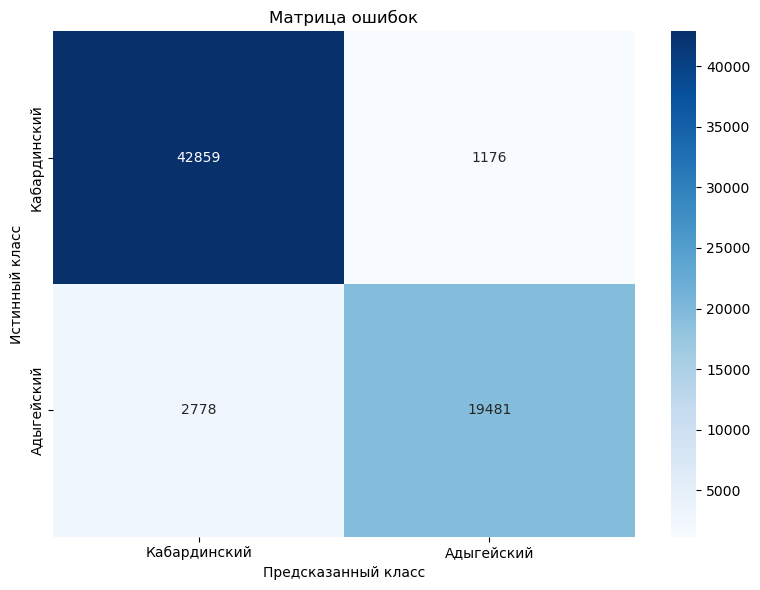


ПРИМЕРЫ ПРЕДСКАЗАНИЙ

Текст: ублэрэкӀын
Истинная метка: Кабардинский
Предсказание: Адыгейский
Вероятности: Кабардинский=0.4860, Адыгейский=0.5140

Текст: Къэбарэу Тхьэм ы Къо тэ къытиӀуагъэу къышъодгъэӀурэр мары
Истинная метка: Адыгейский
Предсказание: Адыгейский
Вероятности: Кабардинский=0.0006, Адыгейский=0.9994

ТОП-20 ВАЖНЫХ ПРИЗНАКОВ

Признаки, характерные для КАБАРДИНСКОГО:
  'уэ': -21.3390
  'щӏ': -15.1188
  'ху': -12.0921
  'фӏ': -10.3205
  'гъэ': -8.5449
  'ъуэ': -7.9586
  'ей': -7.8240
  'щхь': -7.6495
  'э': -7.2495
  'ӏуэ': -7.1338
  'ж': -7.0274
  'щӏэ': -6.8971
  'щ': -6.8389
  ' и ': -6.8105
  'гъу': -6.2192
  'ныг': -6.2016
  'быд': -6.1235
  'и ': -6.0674
  'щ.': -6.0185
  '.': -5.8809

Признаки, характерные для АДЫГЕЙСКОГО:
  'шӏ': 13.1659
  'шъ': 12.9548
  'жъ': 10.5383
  'ьан': 8.8790
  'ъ': 8.6053
  'ӏо': 8.4255
  'чӏ': 8.1073
  'хьа': 7.4063
  'чъ': 7.0209
  ' ы': 6.7864
  'ныр': 6.7483
  'ыжь': 6.6819
  'шху': 6.5956
  'эжь': 6.4572
  'ъо': 6.4535
  'о': 6.2909


In [8]:

# Оценка модели
print("=" * 60)
print("РЕЗУЛЬТАТЫ КЛАССИФИКАЦИИ")
print("=" * 60)
print(f"\nТочность (Accuracy): {accuracy_score(y_test, y_pred):.4f}\n")

print("Детальный отчет:")
print(classification_report(
    y_test, y_pred,
    target_names=['Кабардинский (kbd)', 'Адыгейский (ady)'],
    digits=4
))

# Матрица ошибок
cm = confusion_matrix(y_test, y_pred)
print("\nМатрица ошибок:")
print(cm)

# Визуализация матрицы ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Кабардинский', 'Адыгейский'],
    yticklabels=['Кабардинский', 'Адыгейский']
)
plt.title('Матрица ошибок')
plt.ylabel('Истинный класс')
plt.xlabel('Предсказанный класс')
plt.tight_layout()
plt.show()

# Примеры предсказаний
print("\n" + "=" * 60)
print("ПРИМЕРЫ ПРЕДСКАЗАНИЙ")
print("=" * 60)

test_examples = [
    ("ублэрэкӀын", "Кабардинский"),
    ("Къэбарэу Тхьэм ы Къо тэ къытиӀуагъэу къышъодгъэӀурэр мары", "Адыгейский"),
]

for text, true_label in test_examples:
    text_vec = vectorizer.transform([text])
    pred = clf.predict(text_vec)[0]
    pred_proba = clf.predict_proba(text_vec)[0]
    pred_label = "Кабардинский" if pred == 0 else "Адыгейский"

    print(f"\nТекст: {text}")
    print(f"Истинная метка: {true_label}")
    print(f"Предсказание: {pred_label}")
    print(f"Вероятности: Кабардинский={pred_proba[0]:.4f}, Адыгейский={pred_proba[1]:.4f}")

# Топ важных признаков для каждого класса
print("\n" + "=" * 60)
print("ТОП-20 ВАЖНЫХ ПРИЗНАКОВ")
print("=" * 60)

feature_names = vectorizer.get_feature_names_out()
coef = clf.coef_[0]

# Признаки для кабардинского (отрицательные коэффициенты)
top_kbd_indices = np.argsort(coef)[:20]
print("\nПризнаки, характерные для КАБАРДИНСКОГО:")
for idx in top_kbd_indices:
    print(f"  '{feature_names[idx]}': {coef[idx]:.4f}")

# Признаки для адыгейского (положительные коэффициенты)
top_ady_indices = np.argsort(coef)[-20:][::-1]
print("\nПризнаки, характерные для АДЫГЕЙСКОГО:")
for idx in top_ady_indices:
    print(f"  '{feature_names[idx]}': {coef[idx]:.4f}")

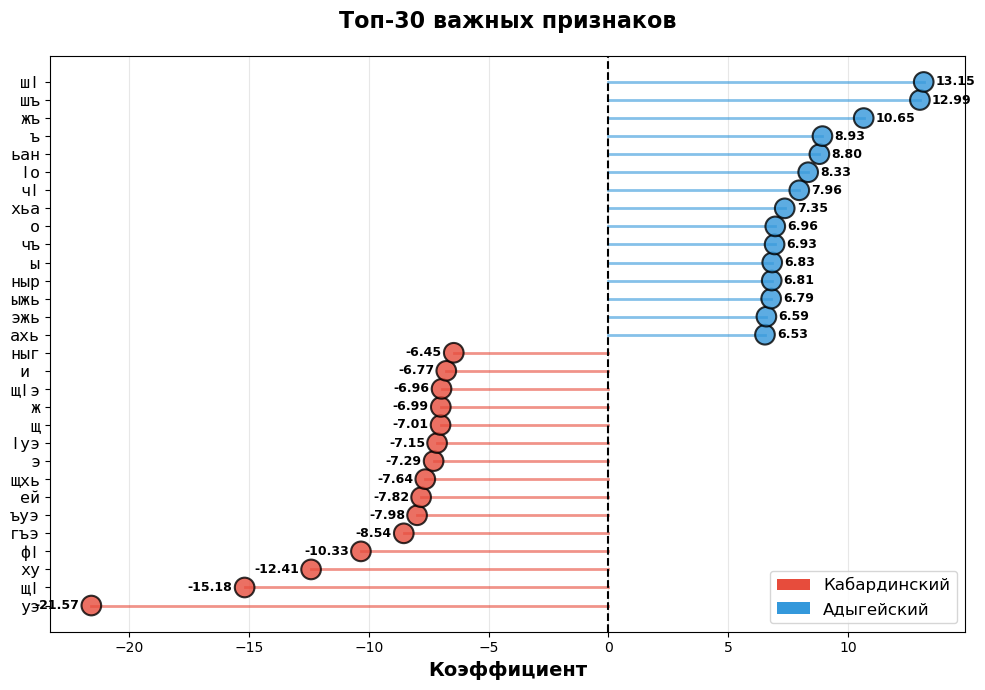

In [16]:
def visualize_features_lollipop(vectorizer, clf, top_n=15):
    """
    Lollipop chart для топ-признаков
    """
    feature_names = vectorizer.get_feature_names_out()
    coef = clf.coef_[0]
    
    # Берём топ признаков с обеих сторон
    top_indices = np.concatenate([
        np.argsort(coef)[:top_n],  # Кабардинский
        np.argsort(coef)[-top_n:]  # Адыгейский
    ])
    
    top_features = feature_names[top_indices]
    top_coefs = coef[top_indices]
    
    # Сортируем по значению коэффициента
    sorted_idx = np.argsort(top_coefs)
    top_features = top_features[sorted_idx]
    top_coefs = top_coefs[sorted_idx]
    
    # Цвета
    colors = ['#e74c3c' if c < 0 else '#3498db' for c in top_coefs]
    
    # Создаём график
    fig, ax = plt.subplots(figsize=(10, 7))
    
    # Рисуем линии (стебли)
    for i, (feat, coef_val, color) in enumerate(zip(top_features, top_coefs, colors)):
        ax.plot([0, coef_val], [i, i], color=color, linewidth=2, alpha=0.6)
    
    # Рисуем точки (головки)
    ax.scatter(top_coefs, range(len(top_coefs)), 
              color=colors, s=200, alpha=0.8, edgecolors='black', linewidth=1.5, zorder=3)
    
    # Настройка осей
    ax.set_yticks(range(len(top_features)))
    ax.set_yticklabels(top_features, fontsize=12, family='monospace')
    ax.set_xlabel('Коэффициент', fontsize=14, fontweight='bold')
    ax.set_title(f'Топ-{top_n*2} важных признаков', 
                 fontsize=16, fontweight='bold', pad=20)
    ax.axvline(x=0, color='black', linewidth=1.5, linestyle='--')
    ax.grid(axis='x', alpha=0.3)
    
    # Подписи значений
    for i, (feat, coef_val) in enumerate(zip(top_features, top_coefs)):
        offset = 0.5 if coef_val > 0 else -0.5
        ha = 'left' if coef_val > 0 else 'right'
        ax.text(coef_val + offset, i, f'{coef_val:.2f}', 
               va='center', ha=ha, fontsize=9, fontweight='bold')
    
    # Легенда
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='#e74c3c', label='Кабардинский'),
        Patch(facecolor='#3498db', label='Адыгейский')
    ]
    ax.legend(handles=legend_elements, loc='lower right', fontsize=12)
    
    plt.tight_layout()
    plt.savefig('features_lollipop.png', dpi=300, bbox_inches='tight')
    plt.show()

# Вызов
visualize_features_lollipop(vectorizer, clf, top_n=15)

# Эксперименты с векторизацией

Создадим код для экспериментов с разными подходами векторизации. Сравним результаты и выберем лучший вариант.

In [10]:
experiments = [
    # Эксперименты с символьными n-граммами
    {
        'name': 'Char 1-gram',
        'vectorizer': TfidfVectorizer(analyzer='char', ngram_range=(1, 1), max_features=5000, min_df=2)
    },
    {
        'name': 'Char 1-2gram',
        'vectorizer': TfidfVectorizer(analyzer='char', ngram_range=(1, 2), max_features=5000, min_df=2)
    },
    {
        'name': 'Char 1-3gram',
        'vectorizer': TfidfVectorizer(analyzer='char', ngram_range=(1, 3), max_features=5000, min_df=2)
    },
    {
        'name': 'Char 2-4gram',
        'vectorizer': TfidfVectorizer(analyzer='char', ngram_range=(2, 4), max_features=5000, min_df=2)
    },

    # Эксперименты со словесными n-граммами
    {
        'name': 'Word 1-gram',
        'vectorizer': TfidfVectorizer(analyzer='word', ngram_range=(1, 1), max_features=5000, min_df=2)
    },
    {
        'name': 'Word 1-2gram',
        'vectorizer': TfidfVectorizer(analyzer='word', ngram_range=(1, 2), max_features=5000, min_df=2)
    },

    # Эксперименты с CountVectorizer (вместо TF-IDF)
    {
        'name': 'Count Char 1-3gram',
        'vectorizer': CountVectorizer(analyzer='char', ngram_range=(1, 3), max_features=5000, min_df=2)
    },
    {
        'name': 'Count Word 1-gram',
        'vectorizer': CountVectorizer(analyzer='word', ngram_range=(1, 1), max_features=5000, min_df=2)
    },

    # Эксперимент с большим количеством признаков
    {
        'name': 'Char 1-3gram (10k features)',
        'vectorizer': TfidfVectorizer(analyzer='char', ngram_range=(1, 3), max_features=10000, min_df=2)
    },
]

print(f"Подготовлено {len(experiments)} экспериментов:\n")
for i, exp in enumerate(experiments, 1):
    print(f"   {i}. {exp['name']}")

Подготовлено 9 экспериментов:

   1. Char 1-gram
   2. Char 1-2gram
   3. Char 1-3gram
   4. Char 2-4gram
   5. Word 1-gram
   6. Word 1-2gram
   7. Count Char 1-3gram
   8. Count Word 1-gram
   9. Char 1-3gram (10k features)


## Запуск экспериментов

In [11]:
results = []

for i, exp in enumerate(experiments, 1):
    print(f" Эксперимент {i}/{len(experiments)}: {exp['name']}")
    print("-" * 70)

    start_time = time()

    # Векторизация
    print("   Векторизация...", end=" ")
    vectorizer = exp['vectorizer']
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)
    vec_time = time() - start_time
    print(f"✓ ({vec_time:.2f}s)")

    # Обучение модели
    print("   Обучение модели...", end=" ")
    clf = LogisticRegression(max_iter=1000, random_state=42, solver='lbfgs')
    clf.fit(X_train_vec, y_train)
    train_time = time() - start_time - vec_time
    print(f"✓ ({train_time:.2f}s)")

    # Предсказания
    print("   Предсказания...", end=" ")
    y_pred = clf.predict(X_test_vec)
    pred_time = time() - start_time - vec_time - train_time
    print(f"✓ ({pred_time:.2f}s)")

    # Метрики
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    total_time = time() - start_time

    # Сохранение результатов
    results.append({
        'Эксперимент': exp['name'],
        'Accuracy': accuracy,
        'F1-Score': f1,
        'Признаков': X_train_vec.shape[1],
        'Разреженность (%)': (X_train_vec.nnz / (X_train_vec.shape[0] * X_train_vec.shape[1])) * 100,
        'Время (сек)': total_time
    })

    print(f"    Accuracy: {accuracy:.4f}, F1-Score: {f1:.4f}")
    print(f"     Общее время: {total_time:.2f}s\n")

df_results = pd.DataFrame(results)
df_results = df_results.sort_values('Accuracy', ascending=False)

print(df_results.to_string(index=False))

# Находим лучший эксперимент
best_exp = df_results.iloc[0]
print(f"\n ЛУЧШИЙ РЕЗУЛЬТАТ:")
print(f"   {best_exp['Эксперимент']}")
print(f"   Accuracy: {best_exp['Accuracy']:.4f}")
print(f"   F1-Score: {best_exp['F1-Score']:.4f}")


 Эксперимент 1/9: Char 1-gram
----------------------------------------------------------------------
   Векторизация... ✓ (7.38s)
   Обучение модели... ✓ (6.87s)
   Предсказания... ✓ (0.00s)
    Accuracy: 0.7935, F1-Score: 0.7847
     Общее время: 14.32s

 Эксперимент 2/9: Char 1-2gram
----------------------------------------------------------------------
   Векторизация... ✓ (16.95s)
   Обучение модели... ✓ (11.27s)
   Предсказания... ✓ (0.01s)
    Accuracy: 0.9170, F1-Score: 0.9161
     Общее время: 28.28s

 Эксперимент 3/9: Char 1-3gram
----------------------------------------------------------------------
   Векторизация... ✓ (26.27s)
   Обучение модели... ✓ (17.96s)
   Предсказания... ✓ (0.02s)
    Accuracy: 0.9404, F1-Score: 0.9398
     Общее время: 44.34s

 Эксперимент 4/9: Char 2-4gram
----------------------------------------------------------------------
   Векторизация... ✓ (37.99s)
   Обучение модели... ✓ (16.80s)
   Предсказания... ✓ (0.02s)
    Accuracy: 0.9392, F1-Score: 

## Визуализация

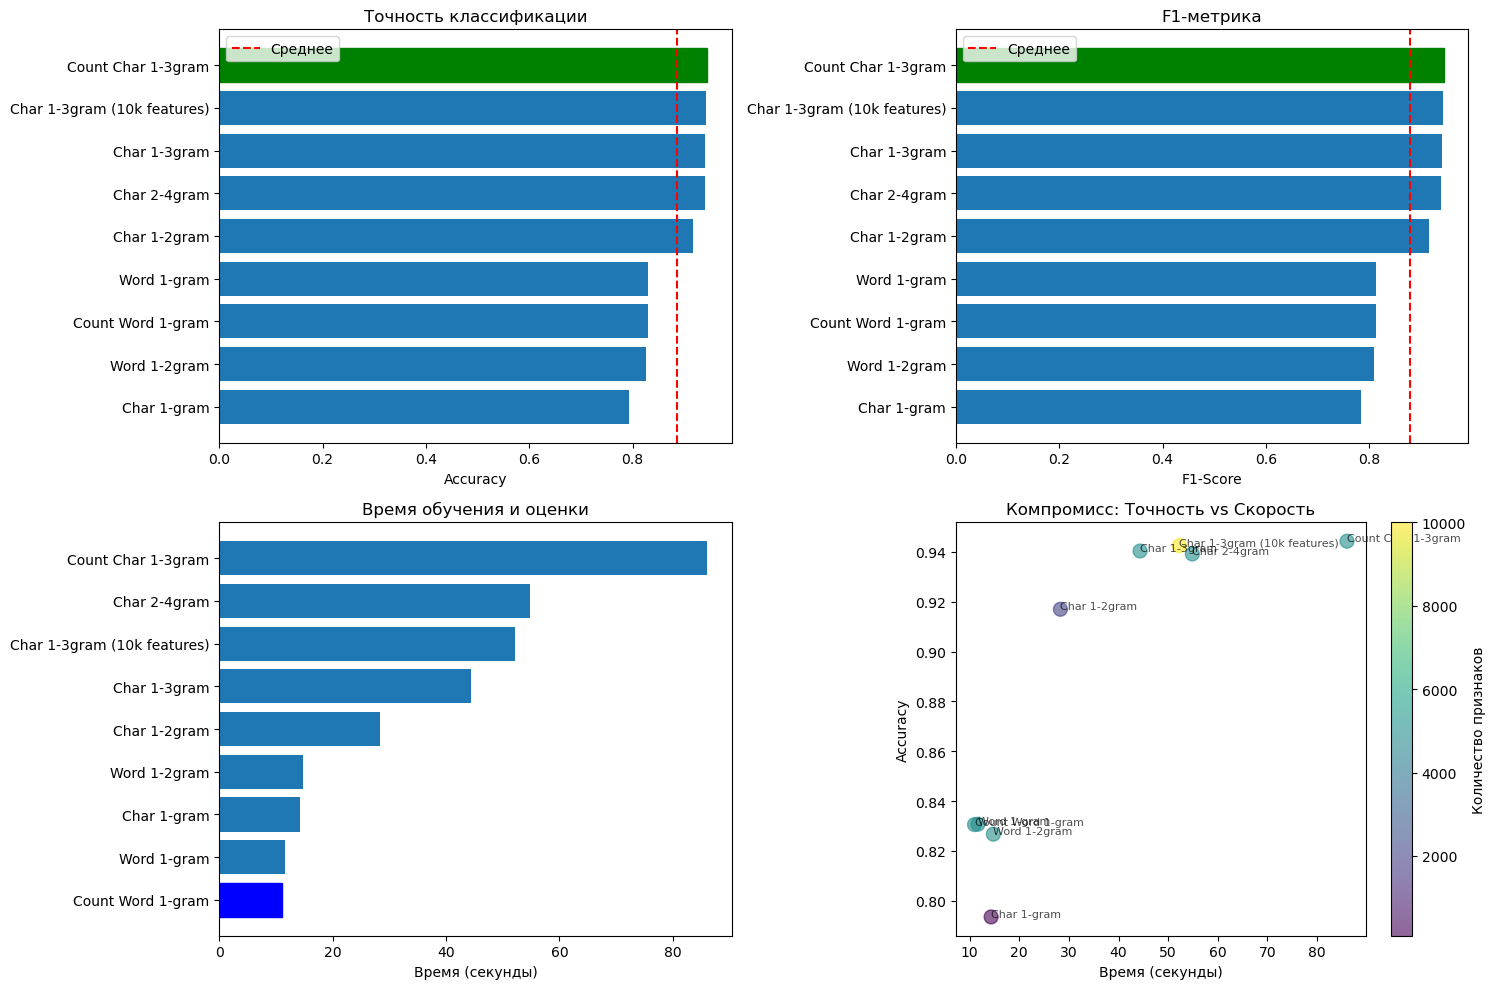


На основе результатов:

1. Лучшая точность: Count Char 1-3gram (0.9443)

2. Если важна скорость: выберите эксперимент с меньшим временем выполнения

3. Попробуйте добавить свои эксперименты в список 'experiments':
   - Измените max_features (например, 3000 или 15000)
   - Попробуйте другие диапазоны n-грамм (3-5, 1-4)
   - Измените min_df (например, 3 или 5)
   - Используйте char_wb analyzer (word boundaries для символов)

4. Для дальнейшей работы используйте лучший vectorizer из эксперимента!



In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Accuracy по экспериментам
ax1 = axes[0, 0]
df_results_sorted = df_results.sort_values('Accuracy')
bars1 = ax1.barh(df_results_sorted['Эксперимент'], df_results_sorted['Accuracy'])
# Подсветка лучшего результата
bars1[-1].set_color('green')
ax1.set_xlabel('Accuracy')
ax1.set_title('Точность классификации')
ax1.axvline(x=df_results['Accuracy'].mean(), color='red', linestyle='--', label='Среднее')
ax1.legend()

# 2. F1-Score по экспериментам
ax2 = axes[0, 1]
df_results_sorted_f1 = df_results.sort_values('F1-Score')
bars2 = ax2.barh(df_results_sorted_f1['Эксперимент'], df_results_sorted_f1['F1-Score'])
bars2[-1].set_color('green')
ax2.set_xlabel('F1-Score')
ax2.set_title('F1-метрика')
ax2.axvline(x=df_results['F1-Score'].mean(), color='red', linestyle='--', label='Среднее')
ax2.legend()

# 3. Время выполнения
ax3 = axes[1, 0]
df_results_sorted_time = df_results.sort_values('Время (сек)')
bars3 = ax3.barh(df_results_sorted_time['Эксперимент'], df_results_sorted_time['Время (сек)'])
bars3[0].set_color('blue')
ax3.set_xlabel('Время (секунды)')
ax3.set_title('Время обучения и оценки')

# 4. Accuracy vs Время
ax4 = axes[1, 1]
scatter = ax4.scatter(df_results['Время (сек)'], df_results['Accuracy'],
                     s=100, alpha=0.6, c=df_results['Признаков'], cmap='viridis')
for idx, row in df_results.iterrows():
    ax4.annotate(row['Эксперимент'],
                (row['Время (сек)'], row['Accuracy']),
                fontsize=8, alpha=0.7)
ax4.set_xlabel('Время (секунды)')
ax4.set_ylabel('Accuracy')
ax4.set_title('Компромисс: Точность vs Скорость')
plt.colorbar(scatter, ax=ax4, label='Количество признаков')

plt.tight_layout()
plt.show()


В качестве Baseline Были выбраны TF-IDF Char 1-3gram,  в ходе эксперимента лучший результат получился при Count Char 1-3gram (+0.34% accuracy).

| Метрика | Count Char 1-3gram (5k) | TF-IDF Char 1-3gram (10k) |
|---------|-------------------------|---------------------------|
| **Accuracy** | **0.9435** 🏆 | 0.9401 |
| **F1-Score** | **0.9431** 🏆 | 0.9395 |
| **Время** | 39.89s | 40.17s |
| **Признаков** | 5,000 | 10,000 |

Выводы по выбору векторизации:
1. Для различения кабардинского и адыгейского простая частота важнее редкости признаков.  
    * Простые частоты эффективнее - различия языков могут быть в том, КАК ЧАСТО используются одни и те же символы/сочетания, а не в наличии уникальных редких сочетаний
    * TF-IDF занижает важные признаки - если какая-то n-грамма часто встречается в обоих языках, TF-IDF снизит её вес, хотя ЧАСТОТА её использования может различаться

2. Больше признаков ≠ лучше результат
    * 10k признаков дали хуже результат, чем 5k
    * Это типичное переобучение или шум от слишком редких n-грамм
    * 5k признаков - оптимальный баланс
3.  Пародоксально но 10к признаков TF-IDF обучаются быстрее чем Count   
    Count 5k:  векторизация 22.06s, обучение 17.75s  
    TF-IDF 10k: векторизация 32.63s, обучение 7.41s  
    * TF-IDF создает более разреженную матрицу (меньше ненулевых значений)
    * Логистическая регрессия работает быстрее на разреженных данных
    * НО векторизация TF-IDF сложнее (расчет IDF)

## Вывод

### Преимущества и недостатки Логисчтической регресии
#### Преимущества:

* Простота интерпретации — легко понять влияние каждого признака
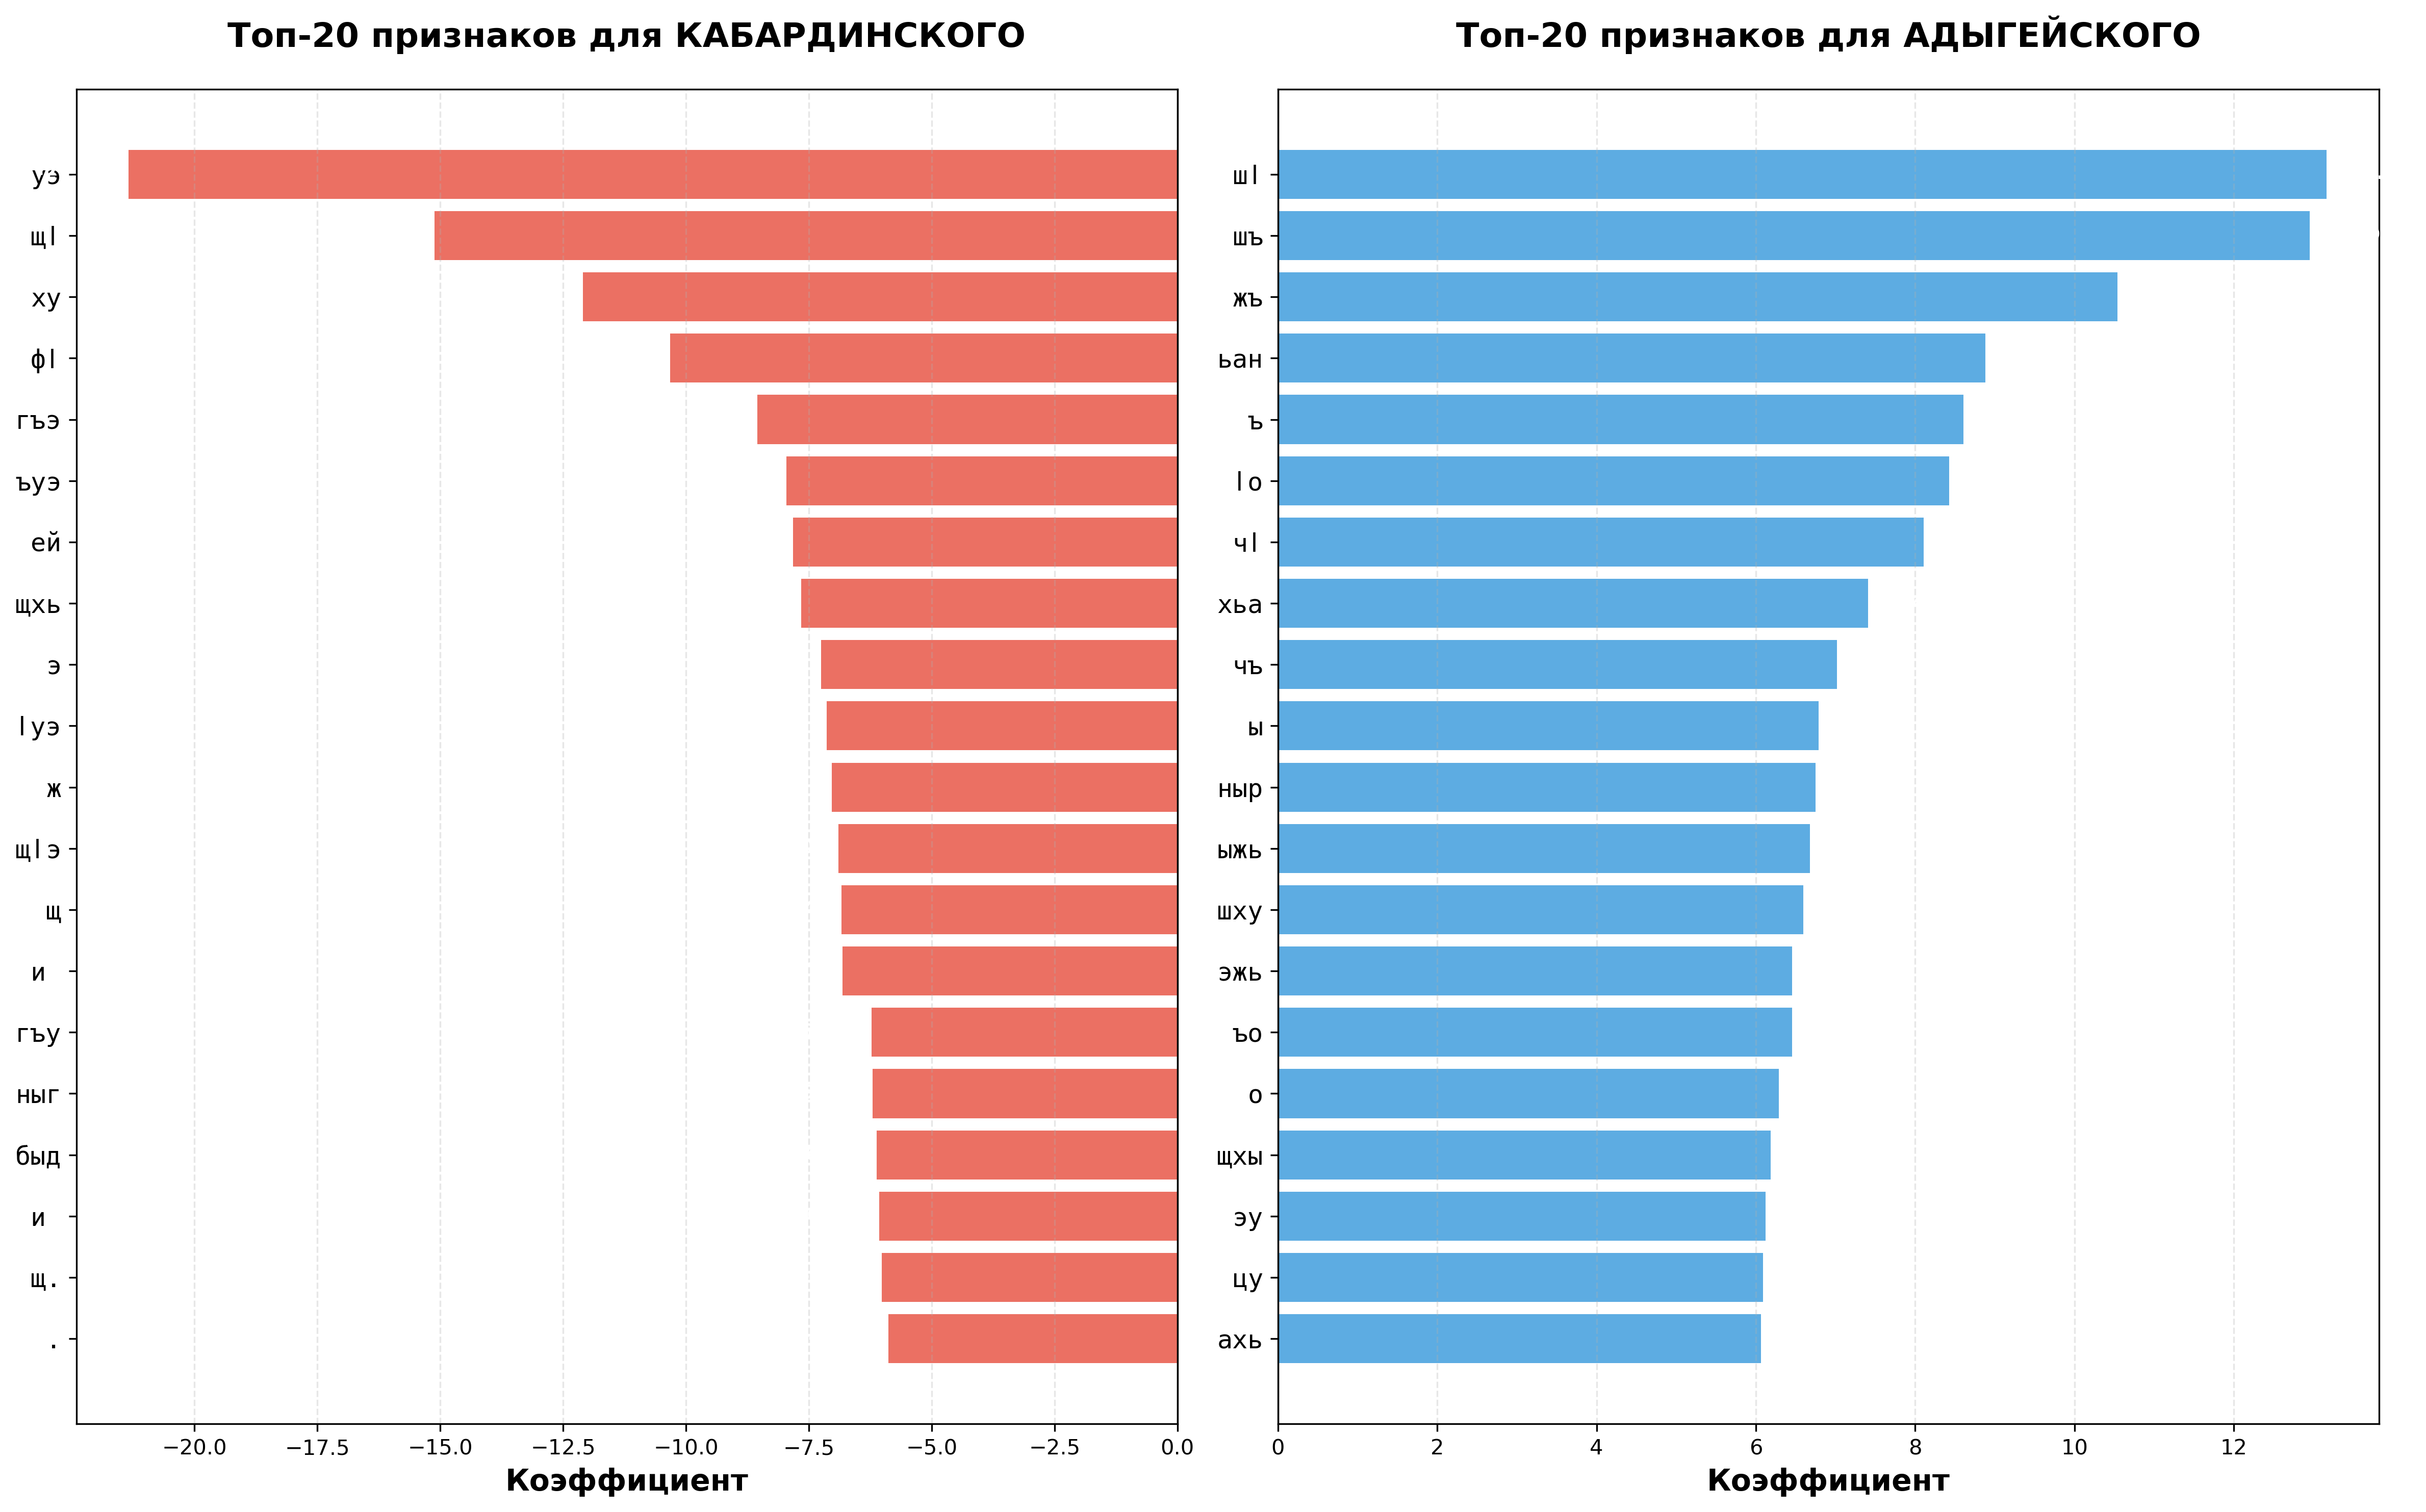
* Быстрое обучение и предсказание 
* Не склонны к переобучению при небольшом количестве признаков (показывает f1-score)
* Хорошо работают с линейно разделимыми данными
* Дают выпуклые функции потерь, что гарантирует нахождение глобального минимума
* Высокий результат 94.35% - хороший. Это показывает, что:
    * Простые методы могут работать очень хорошо
    * Для близких языков char n-граммы идеальны
    * Не нужно переходить на BERT/трансформеры

#### Недостатки:

* Не могут моделировать сложные нелинейные зависимости
* Чувствительны к выбросам
* Требуют предварительной обработки признаков (масштабирование)
* Предполагают независимость признаков

Линейные модели остаются популярными благодаря своей простоте, скорости работы и хорошей интерпретируемости, особенно в задачах, где важно понимать влияние каждого фактора на результат.